# Waste Water Management 

TimeSeries Data Analysis - Hillsborough

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import pandas as pd
import numpy as np

def df_info_func(df, vizualize=False, threshold=3, display_sample=True, side_by_side=True):
    def f1(series):
        try: return str(series.unique().tolist())
        except: return '--'

    print(f'Rows: {df.shape[0]} N Cols: {df.shape[1]}')

    if df.shape[0] > 0:
        df_info = pd.DataFrame(index=df.columns)
        df_info['data_types'] = df.dtypes.values
        df_info['n_missing'] = df.isna().sum().values    
        df_info['missing_pct'] = round((df_info['n_missing'] / len(df))*100,2)

        df_ = df.astype(str).copy()

        df_info['n_unique'] = df_.apply(lambda x: x.nunique(),axis=0).values
        df_info['uniq_vals'] = df_.apply(lambda x: np.where(x.nunique() <= threshold, f1(x), '--')).values

        for c in df.columns:            
            if df[c].dtype == 'datetime64[ns]':
                dt_str = "From: " + df[c].min().strftime('%d-%b-%Y')
                dt_str += " Till: " + df[c].max().strftime('%d-%b-%Y')
                df_info.loc[c,'uniq_vals'] = dt_str                
            elif df[c].dtype == 'float64' or  df[c].dtype == 'int64':
                real_num_series = df[c].dropna()
                if len(real_num_series) > 0:
                    dt_str = "Min: " + str(int(real_num_series.min()))
                    dt_str += " Max: " + str(int(real_num_series.max()))
                    dt_str += " Mean: " + str(int(real_num_series.mean()))
                    dt_str += " Med: " + str(int(real_num_series.median()))
                    dt_str += " Std: " + str(int(real_num_series.std()))
                else:
                    dt_str = ""
                df_info.loc[c,'uniq_vals'] = dt_str
            else:
                pass
                
        df_info.reset_index(inplace=True)
        df_info.rename(columns={'index':'cols'},inplace=True)
        if vizualize:
            # import seaborn as sns
            # sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
            # or an another package to display missing values graph
            import missingno as msno 
            msno.matrix(df)

        if side_by_side:
            from IPython.display import display_html
            space = "\xa0" * 10
            info_styler = df_info.style.set_table_attributes("style='display:inline'").set_caption('DF Info')
            df_styler = df.head().style.set_table_attributes("style='display:inline'").set_caption('DF')
            display_html(info_styler._repr_html_() + space + df_styler._repr_html_(),raw=True)            
        else:
            from IPython.core.display import HTML
            display(HTML(df_info.to_html()))
            if display_sample: display(HTML(df.head().to_html()))
            
    else:
        print("Empty DataFrame")


In [10]:
df = pd.read_csv("datasets/Hillsborough.csv")
df['Time'] = pd.to_datetime(df['Time'])
df_info_func(df)

Rows: 7296 N Cols: 2


DF Info cols data_types n_missing missing_pct n_unique uniq_vals 
 
 0 
 Time 
 datetime64[ns] 
 0 
 0.000000 
 7296 
 From: 03-Jan-2012 Till: 29-Dec-2012 
 
 
 1 
 Demand (MLD) 
 float64 
 166 
 2.280000 
 6995 
 Min: 22 Max: 251 Mean: 113 Med: 109 Std: 33 
 
            DF Time Demand (MLD) 
 
 0 
 2012-01-03 00:00:00 
 108.811323 
 
 
 1 
 2012-01-03 01:00:00 
 123.998979 
 
 
 2 
 2012-01-03 02:00:00 
 133.331252 
 
 
 3 
 2012-01-03 03:00:00 
 142.121897 
 
 
 4 
 2012-01-03 04:00:00 
 138.773395

In [13]:
pd.infer_freq(df['Time'])

In [34]:
df.sort_values(by='Time',inplace=True)
df.head().append(df.tail())

,Time,Demand (MLD)
0,2012-01-03 00:00:00,108.811323
1,2012-01-03 01:00:00,123.998979
2,2012-01-03 02:00:00,133.331252
3,2012-01-03 03:00:00,142.121897
4,2012-01-03 04:00:00,138.773395
7291,2012-12-29 19:00:00,121.705342
7292,2012-12-29 20:00:00,105.903189
7293,2012-12-29 21:00:00,86.954423
7294,2012-12-29 22:00:00,70.825465
7295,2012-12-29 23:00:00,91.368515


In [29]:
(df['Time'] - df['Time'].shift(1)).dt.components.days.unique()

array([nan,  0., 21., 19.,  2.])

In [30]:
pd.date_range(df['Time'].min(), df['Time'].max(), freq='h')

DatetimeIndex(['2012-01-03 00:00:00', '2012-01-03 01:00:00',
               '2012-01-03 02:00:00', '2012-01-03 03:00:00',
               '2012-01-03 04:00:00', '2012-01-03 05:00:00',
               '2012-01-03 06:00:00', '2012-01-03 07:00:00',
               '2012-01-03 08:00:00', '2012-01-03 09:00:00',
               ...
               '2012-12-29 14:00:00', '2012-12-29 15:00:00',
               '2012-12-29 16:00:00', '2012-12-29 17:00:00',
               '2012-12-29 18:00:00', '2012-12-29 19:00:00',
               '2012-12-29 20:00:00', '2012-12-29 21:00:00',
               '2012-12-29 22:00:00', '2012-12-29 23:00:00'],
              dtype='datetime64[ns]', length=8688, freq='H')

In [ ]:
df.apply(np.isreal).all(1)

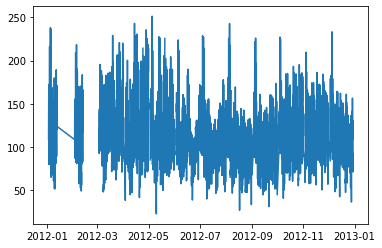

In [16]:
%matplotlib inline
plt.plot('Time','Demand (MLD)',data=df)